## Imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

### Code

In [33]:

def SIR_P1(S0,I0,R0, beta, gamma, mu_birth, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N0 = R0 + I0 + S0
    N = np.zeros(len(T))
    mu_death = 0.5*mu_birth
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N[idx] = N0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N[idx-1] - mu_death*S[idx-1] + mu_birth*N[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N[idx-1] - gamma * I[idx-1] - mu_death*I[idx-1]
            dR_dt = gamma * I[idx-1] - mu_death*R[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N[idx] = S[idx] + I[idx] + R[idx]
            
    return S, I, R, N, T

### Simulation and plot

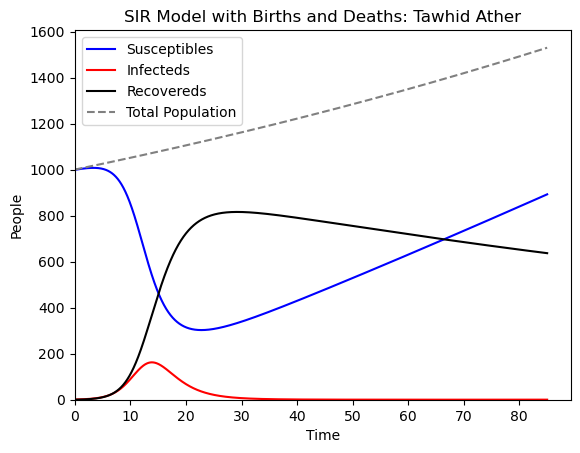

In [36]:
N0 = 1000
I0 = 1
S0 = 999
R0 = N0 - I0 - S0
beta = 1
gamma = 0.5
mu_birth = 0.01
max_t = 85
stepsize = 0.01

# SIR_P1(S0,I0,R0, beta, gamma, t_max, stepsize):
S,I,R,N,T = SIR_P1(S0,I0, R0, beta, gamma, mu_birth, max_t, stepsize)
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.plot(T,N, linestyle='--', color='gray', label='Total Population')
ax.set_xlabel('Time')
ax.set_ylabel('People')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.title('SIR Model with Births and Deaths: Tawhid Ather')
plt.show()